# Classification Analysis

### Implementation of Support Vector Machines (SVM) for classifying images of hand
### written digits into their respective numerical classes (0 to 9). 

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt

C:\Users\kalpe\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load the handwritten images dataset

In [2]:
dataset = load_digits()

### Check the data and target values from the dataset

In [3]:
dataset.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
dataset.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
dataset.data.shape

(1797, 64)

In [6]:
dataset.target.shape

(1797,)

In [7]:
dataset.images.shape

(1797, 8, 8)

In [8]:
dataset.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [9]:
df2 = dataset.images.reshape(1,-1)
df2.shape

(1, 115008)

### Number of images

In [10]:
len(dataset.images)

1797

### Check the nth image in the dataset

<Figure size 432x288 with 0 Axes>

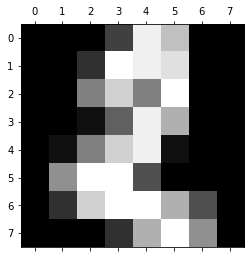

In [11]:
n = 2

plt.gray()
plt.matshow(dataset.images[n])
plt.show()

In [12]:
dataset.images[n]

array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
       [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
       [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
       [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0.],
       [ 0.,  1.,  8., 13., 15.,  1.,  0.,  0.],
       [ 0.,  9., 16., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  3., 13., 16., 16., 11.,  5.,  0.],
       [ 0.,  0.,  0.,  3., 11., 16.,  9.,  0.]])

In [13]:
X = dataset.images.reshape((len(dataset.images), -1))
X.shape

(1797, 64)

In [14]:
Y =  dataset.target
Y.shape

(1797,)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=0)
print(y_train.shape)
print(X_test.shape)

(1347,)
(450, 64)


In [16]:
from sklearn import svm
model = svm.SVC(gamma=0.001)
model.fit(X_train,y_train)

SVC(gamma=0.001)

[1]




C:\Users\kalpe\AppData\Local\Temp/ipykernel_15688/4101013325.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('%i' %result)


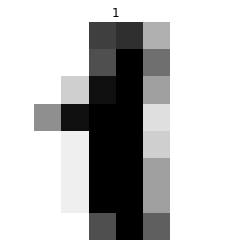

In [17]:
n = 1
result = model.predict(dataset.images[n].reshape((1,-1)))
plt.imshow(dataset.images[n],cmap=plt.cm.gray_r,interpolation='nearest')
print(result)

print("\n")

plt.axis("off")
plt.title('%i' %result)
plt.show()

Enter index: 7


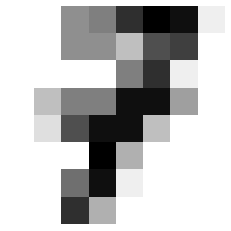

In [20]:
# Set value of nth index here
nth = int(input("Enter index: "))

while (nth < 0 or nth > 1797):
    print("invlaid")
    nth = int(input("Enter index: "))

plt.imshow(dataset.images[nth],cmap=plt.cm.gray_r,interpolation='nearest')
plt.axis("off")

plt.show()

In [21]:
# Predicted value here
predicted_nth = model.predict(dataset.images[nth].reshape((1,-1)))
print("Predicted value: ", predicted_nth)

Predicted value:  [7]


In [22]:
Y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
print("Accuracy score of model is {0}%".format(accuracy_score(y_test,Y_pred)*100))

Accuracy score of model is 99.55555555555556%


In [24]:
model1 = svm.SVC(kernel="linear")
model13 = svm.SVC(gamma=0.001)
model14 = svm.SVC(gamma=0.001, C=8.1)

model1.fit(X_train, y_train)
model13.fit(X_train, y_train)
model14.fit(X_train, y_train)

Y_predModel1 = model1.predict(X_test)
Y_predMode13 = model13.predict(X_test)
Y_predMode14 = model14.predict(X_test)

print("Accuracy of Model 1: {:.2f}%".format(accuracy_score(y_test, Y_predModel1) * 100))
print("Accuracy of Model 3: {:.2f}%".format(accuracy_score(y_test, Y_predMode13) * 100))
print("Accuracy of Model 4: {:.2f}%".format(accuracy_score(y_test, Y_predMode14) * 100))

Accuracy of Model 1: 97.11%
Accuracy of Model 3: 99.56%
Accuracy of Model 4: 99.33%
